# EcoFOCIpy ADCP QC - 21BSP-2A

- mostly remove >100 cm/s flows in u/v


In [1]:
import xarray as xa
import numpy as np

import matplotlib.pyplot as plt


In [2]:
xdf = xa.load_dataset('19ckp3a_0035m.nc')

In [3]:
xdf =xdf.where(xdf.u_curr_comp <=100,np.nan)
xdf

<xarray.Dataset>
Dimensions:          (latitude: 1, longitude: 1, time: 2299, depth: 12)
Coordinates:
  * time             (time) datetime64[ns] 2019-08-05 ... 2019-11-08T18:00:00
  * depth            (depth) float64 -15.0 -11.0 -7.0 -3.0 ... 21.0 25.0 29.0
  * latitude         (latitude) float64 71.82
  * longitude        (longitude) float64 -166.1
Data variables:
    u_curr_comp      (latitude, longitude, time, depth) float64 nan ... -3.48
    v_curr_comp      (latitude, longitude, time, depth) float64 nan ... -8.166
    w_curr_comp      (latitude, longitude, time, depth) float64 nan nan ... 0.3
    w_curr_comp_err  (latitude, longitude, time, depth) float64 nan nan ... -0.1
    agc1             (latitude, longitude, time, depth) float64 nan ... 153.0
    agc2             (latitude, longitude, time, depth) float64 nan ... 147.0
    agc3             (latitude, longitude, time, depth) float64 nan ... 159.0
    agc4             (latitude, longitude, time, depth) float64 nan ... 150.0
Attributes:
    Latitude_DegMMddW:                      71 49.486 N
    Longitude_DegMMddN:                     166 3.560 W
    MooringID:                              19CKP-3A
    platform_deployment_date:               2019-08-13T15:56:36Z
    platform_deployment_cruise_name:        OS1901
    platform_recovery_date:                 2022-10-16T01:13:00Z
    platform_recovery_cruise_name:          SKQ202214S
    platform_deployment_recovery_comments:  
    WaterDepth:                             46.0
    date_created:                           2022-11-22T14:43:52Z
    date_modified:                          
    QC_indicator:                           unknown

In [4]:
# xdf['history'] = xdf.history + 'QC of high u/v values'

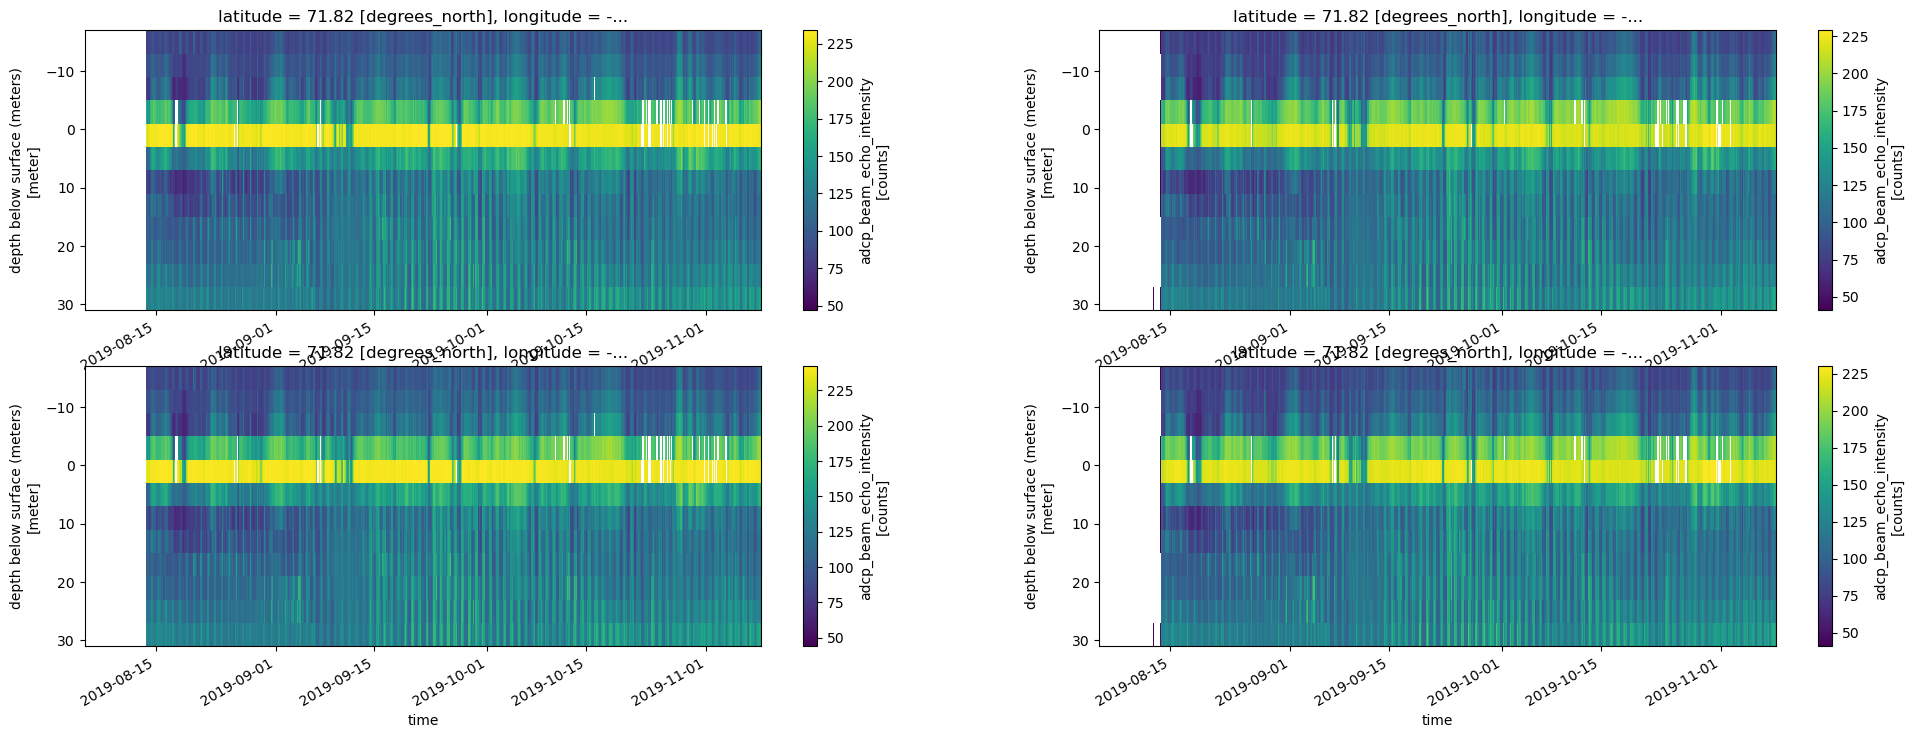

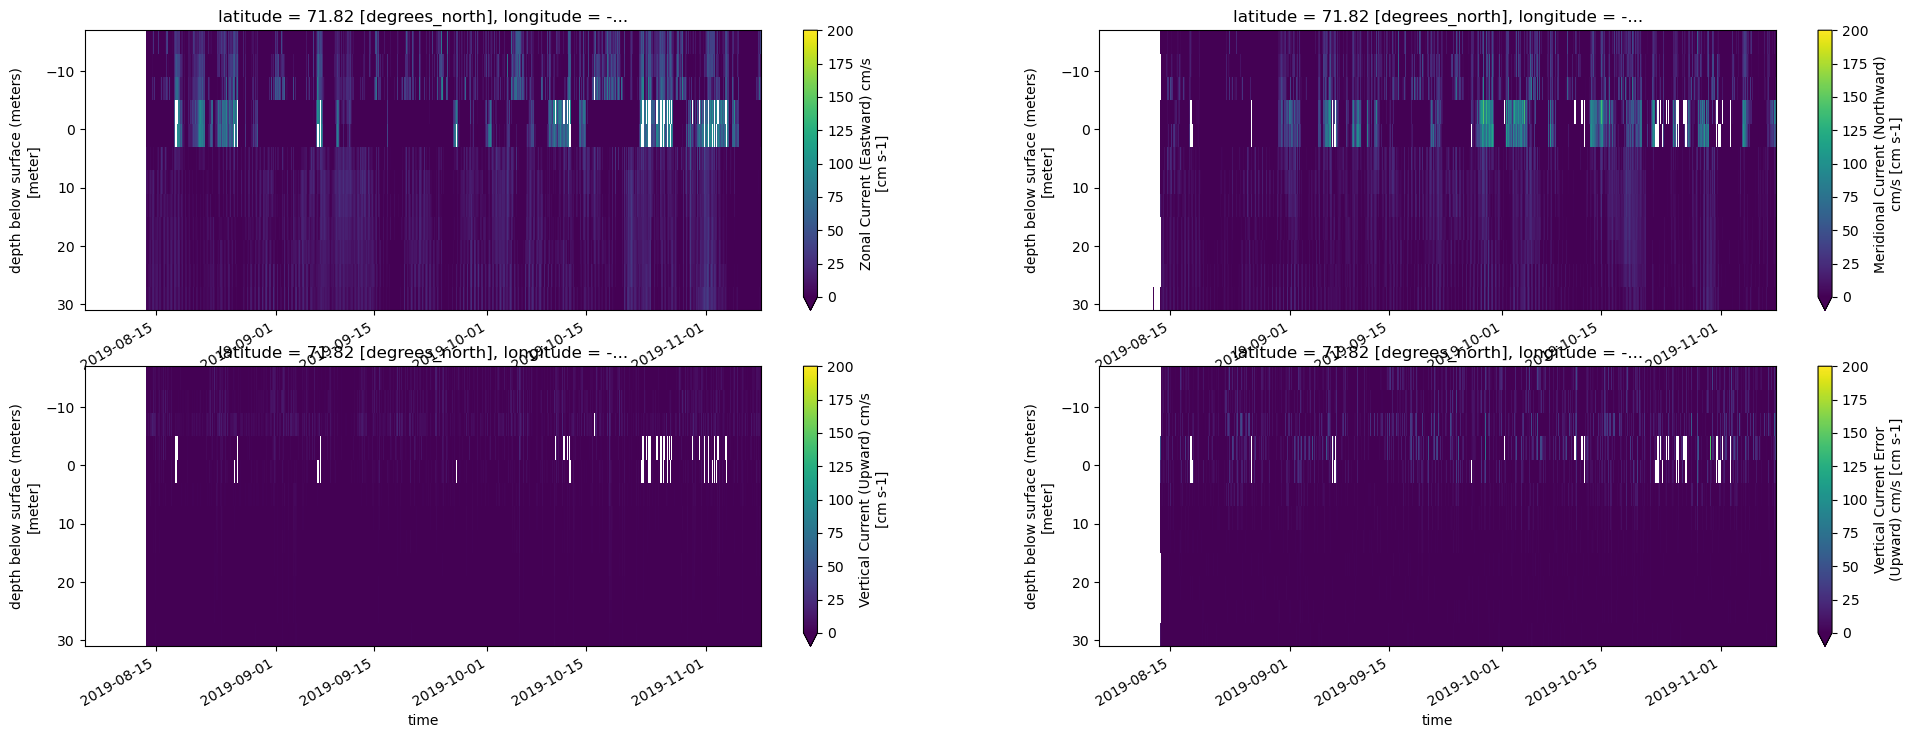

In [5]:
#optional plotting

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    xdf['agc1'].T.plot(ax=axes[0,0], yincrease=False)
    xdf['agc2'].T.plot(ax=axes[0,1], yincrease=False)
    xdf['agc3'].T.plot(ax=axes[1,0], yincrease=False)
    xdf['agc4'].T.plot(ax=axes[1,1], yincrease=False)
except:
    pass

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    xdf['u_curr_comp'].T.plot(ax=axes[0,0],vmin=0, vmax=200, yincrease=False)
    xdf['v_curr_comp'].T.plot(ax=axes[0,1],vmin=0, vmax=200, yincrease=False)
    xdf['w_curr_comp'].T.plot(ax=axes[1,0],vmin=0, vmax=200, yincrease=False)
    xdf['w_curr_comp_err'].T.plot(ax=axes[1,1],vmin=0, vmax=200, yincrease=False)
except:
    pass

In [6]:
try:
    xdf.attrs['history'] = xdf.attrs['history']+'  removed U,V >100cm/s'
except:
    xdf.attrs['history'] = '  removed U,V >100cm/s'    

## Trim above surface (negative values)

In [7]:
ixdf = xdf.where(xdf.depth >=-0.).dropna(how='all',dim='depth')

In [8]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  trimmed above surface'

In [9]:
ixdf.to_netcdf('19ckp3a_0035m.trimmed.nc')

In [10]:
xdf = xa.load_dataset('19ckp3a_0035m.trimmed.nc')

In [11]:
ixdf = xdf.interpolate_na(dim='time',max_gap='2H')

In [12]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  linearly interpolated 1hour gaps'

## Interpolate over singleton missing gaps linearly

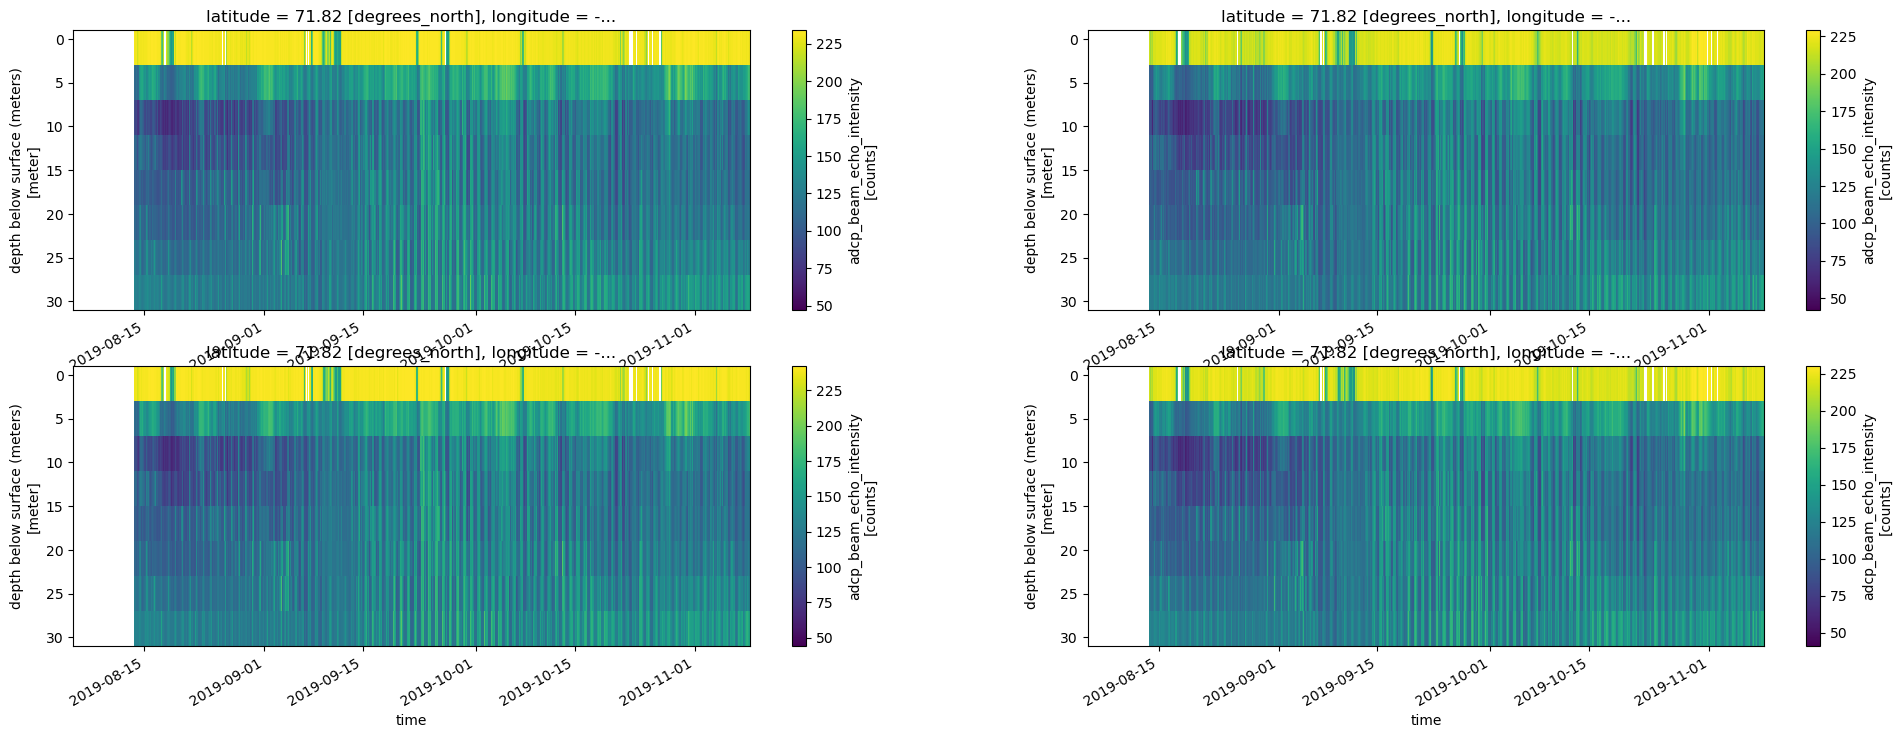

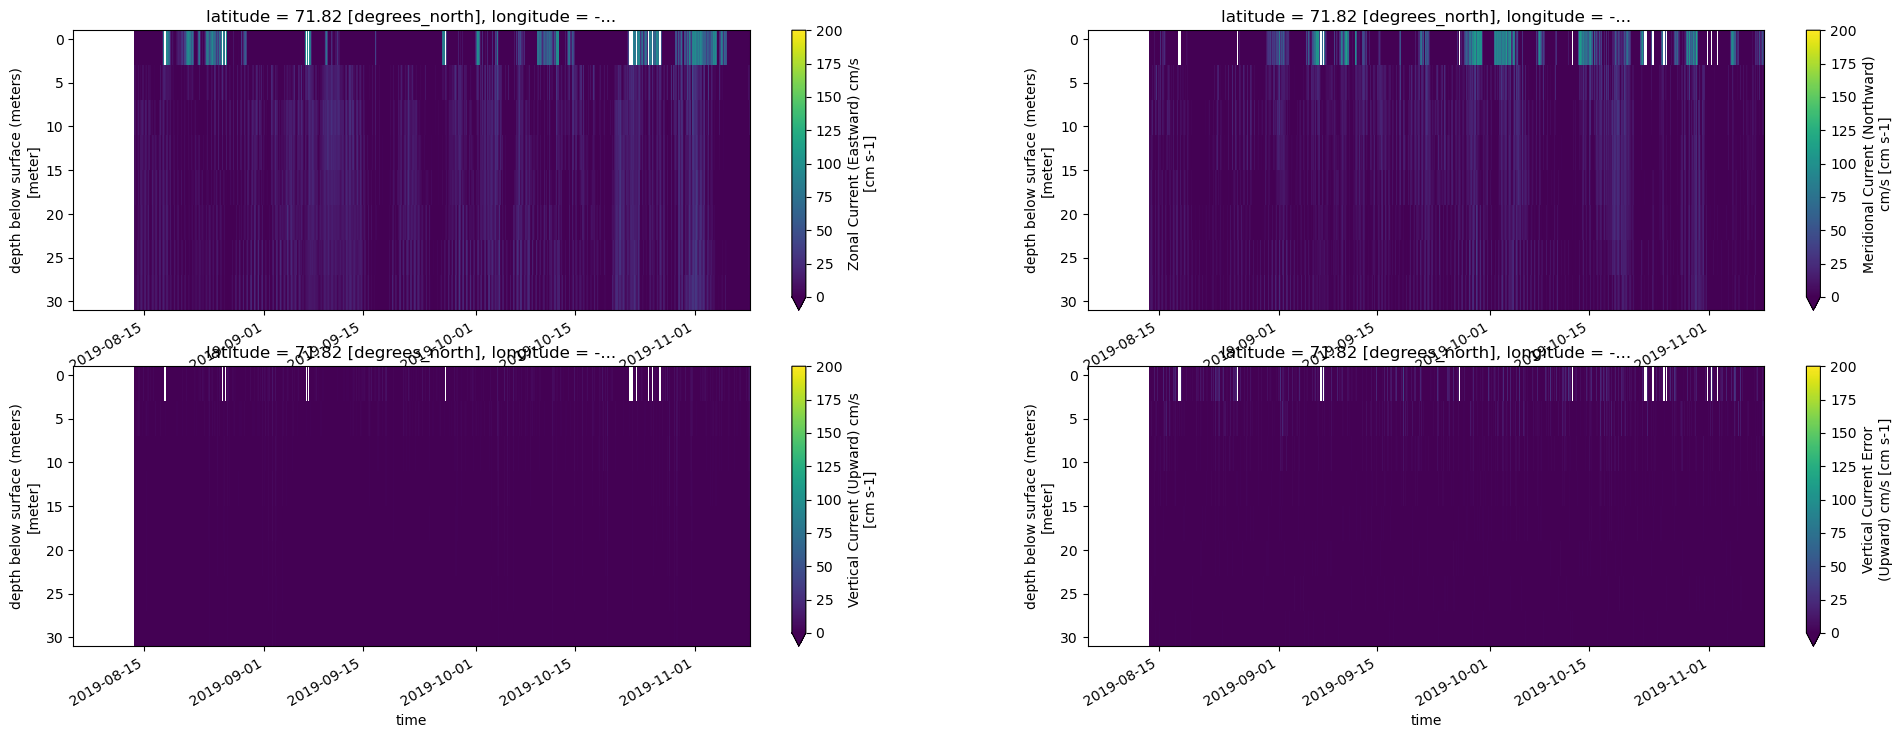

In [13]:

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    ixdf['agc1'].T.plot(ax=axes[0,0], yincrease=False)
    ixdf['agc2'].T.plot(ax=axes[0,1], yincrease=False)
    ixdf['agc3'].T.plot(ax=axes[1,0], yincrease=False)
    ixdf['agc4'].T.plot(ax=axes[1,1], yincrease=False)
except:
    pass

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    ixdf['u_curr_comp'].T.plot(ax=axes[0,0],vmin=0, vmax=200, yincrease=False)
    ixdf['v_curr_comp'].T.plot(ax=axes[0,1],vmin=0, vmax=200, yincrease=False)
    ixdf['w_curr_comp'].T.plot(ax=axes[1,0],vmin=0, vmax=200, yincrease=False)
    ixdf['w_curr_comp_err'].T.plot(ax=axes[1,1],vmin=0, vmax=200, yincrease=False)
except:
    pass

In [14]:
ixdf.to_netcdf('19ckp3a_0035m.filtered.nc')